<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [1]:
import yfinance as yf

# Create a Ticker object for Tesla (TSLA)
ticker_symbol = "TSLA"
tesla_ticker = yf.Ticker(ticker_symbol)


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [3]:
import yfinance as yf

# Create a Ticker object for Tesla (TSLA)
ticker_symbol = "TSLA"
tesla_ticker = yf.Ticker(ticker_symbol)

# Extract historical stock information and save it in a DataFrame
tesla_data = tesla_ticker.history(period="max")

# Display the DataFrame
print(tesla_data)


                  Open        High         Low       Close     Volume  \
Date                                                                    
2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500   
2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500   
2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000   
2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000   
2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500   
...                ...         ...         ...         ...        ...   
2023-11-17  232.000000  237.389999  226.539993  234.300003  142532800   
2023-11-20  234.039993  237.100006  231.020004  235.600006  116320100   
2023-11-21  235.039993  243.619995  233.339996  241.199997  122288000   
2023-11-22  242.039993  244.009995  231.399994  234.210007  117950600   
2023-11-24  233.750000  238.750000  232.330002  235.449997   65125200   

            Dividends  Stock Splits  
Date        

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [4]:
import yfinance as yf

# Create a Ticker object for Tesla (TSLA)
ticker_symbol = "TSLA"
tesla_ticker = yf.Ticker(ticker_symbol)

# Extract historical stock information and save it in a DataFrame
tesla_data = tesla_ticker.history(period="max")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [5]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [6]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Now, you can work with the parsed HTML data using BeautifulSoup
# For example, you can print the title of the webpage:
print("Webpage Title:", soup.title.text)


Webpage Title: Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [7]:
from bs4 import BeautifulSoup
import pandas as pd

# Assuming html_data contains the HTML content you previously fetched

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing Tesla Revenue (you may need to inspect the HTML structure)
# For example, if it's the first table on the page, you can use soup.find('table')
table = soup.find('table')

# Use pandas read_html to extract the table into a DataFrame
tesla_revenue = pd.read_html(str(table))[0]

# Assuming the DataFrame has columns Date and Revenue
# If not, you may need to modify the DataFrame accordingly

# Display the DataFrame
print(tesla_revenue.head())


   Tesla Annual Revenue(Millions of US $)  \
0                                    2021   
1                                    2020   
2                                    2019   
3                                    2018   
4                                    2017   

  Tesla Annual Revenue(Millions of US $).1  
0                                  $53,823  
1                                  $31,536  
2                                  $24,578  
3                                  $21,461  
4                                  $11,759  


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [11]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
print(tesla_revenue.columns)

KeyError: 'Revenue'

Execute the following lines to remove an null or empty strings in the Revenue column.


In [12]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

KeyError: 'Revenue'

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [13]:
print(tesla_revenue.tail())

    Tesla Annual Revenue(Millions of US $)  \
8                                     2013   
9                                     2012   
10                                    2011   
11                                    2010   
12                                    2009   

   Tesla Annual Revenue(Millions of US $).1  
8                                    $2,013  
9                                      $413  
10                                     $204  
11                                     $117  
12                                     $112  


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [15]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
ticker_symbol = "GME"
gamestop_ticker = yf.Ticker(ticker_symbol)


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [16]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
ticker_symbol = "GME"
gamestop_ticker = yf.Ticker(ticker_symbol)

# Extract historical stock information and save it in a DataFrame
gme_data = gamestop_ticker.history(period="max")

# Display the DataFrame
print(gme_data)


                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2002-02-13   1.620129   1.693350   1.603296   1.691667  76216000        0.0   
2002-02-14   1.712707   1.716074   1.670626   1.683251  11021600        0.0   
2002-02-15   1.683250   1.687458   1.658002   1.674834   8389600        0.0   
2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400        0.0   
2002-02-20   1.615921   1.662210   1.603296   1.662210   6892800        0.0   
...               ...        ...        ...        ...       ...        ...   
2023-11-17  12.520000  13.060000  12.520000  13.030000   3414200        0.0   
2023-11-20  13.000000  13.200000  12.800000  12.800000   2294900        0.0   
2023-11-21  12.650000  12.720000  12.260000  12.550000   3710100        0.0   
2023-11-22  12.560000  12.710000  12.190000  12.290000   2358800        0.0   
2023-11-24  12.220000  12.410000  12.180000  12.2000

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [17]:
# Assuming gme_data is the DataFrame containing GameStop stock data

# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683251  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [18]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [19]:
from bs4 import BeautifulSoup

# Assuming html_data contains the HTML content you previously fetched

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Now, you can work with the parsed HTML data using BeautifulSoup
# For example, you can print the title of the webpage:
print("Webpage Title:", soup.title.text)


Webpage Title: GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [21]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing GameStop Revenue
table = soup.find_all("tbody")[1]

# Extract rows from the table
rows = table.find_all('tr')

# Initialize lists to store data
data = {
    'Date': [],
    'Revenue': []
}

# Loop through rows and extract data
for row in rows:
    columns = row.find_all('td')
    if len(columns) == 2:  # Ensure there are two columns (Date and Revenue)
        date, revenue = columns[0].text.strip(), columns[1].text.strip()
        
        # Remove commas and dollar signs from the Revenue column
        revenue = revenue.replace(',','').replace('$','')
        
        # Append data to lists
        data['Date'].append(date)
        data['Revenue'].append(revenue)

# Create a DataFrame from the collected data
gme_revenue = pd.DataFrame(data)

# Display the DataFrame
print(gme_revenue.head())


         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [22]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [25]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, stock_name):
    # Print the column names of tesla_data
    print("tesla_data columns:", stock_data.columns)

    # Print the column names of tesla_revenue
    print("tesla_revenue columns:", revenue_data.columns)

    # Assuming stock_data and revenue_data are DataFrames with Date-like columns
    merged_data = pd.merge(stock_data, revenue_data, left_on='Date', right_on='Date', how='inner')

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['Date'], merged_data['Close'], label=f'{stock_name} Stock Price', color='blue')
    plt.plot(merged_data['Date'], merged_data['Revenue'], label=f'{stock_name} Revenue', color='orange')

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{stock_name} Stock Data and Revenue')
    plt.legend()

    # Display the plot
    plt.show()

# Assuming tesla_data and tesla_revenue are the DataFrames for Tesla stock data and revenue
# Adjust column names if necessary
make_graph(tesla_data, tesla_revenue, 'Tesla')


tesla_data columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
tesla_revenue columns: Index(['Tesla Annual Revenue(Millions of US $)', 'Tesla Annual Revenue(Millions of US $).1'], dtype='object')


KeyError: 'Date'

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


tesla_data columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
tesla_revenue columns: Index(['Date', 'Revenue'], dtype='object')


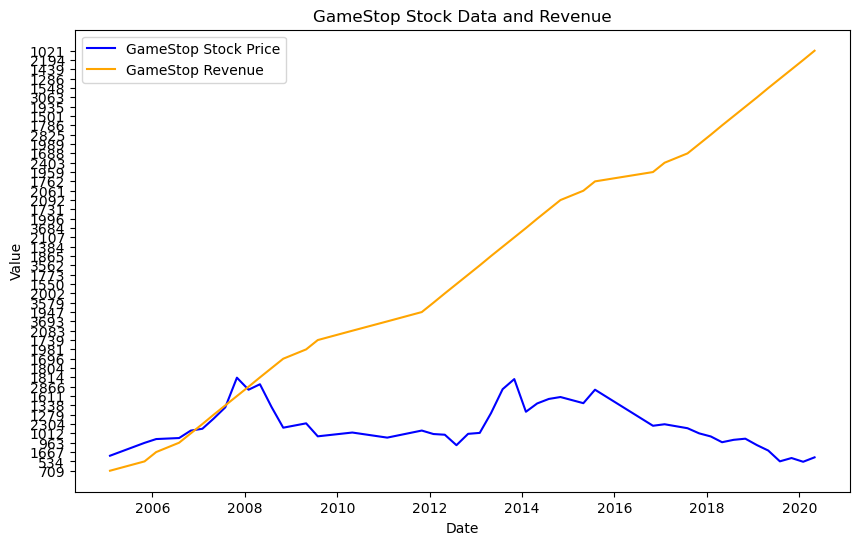

In [27]:
import pandas as pd

# Assuming gme_revenue is the DataFrame containing GameStop revenue data
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Now, you can call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
